# Data Analytics I

# **Training and Test Samples**

**Authors:**
[Anthony Strittmatter](http://www.anthonystrittmatter.com)


We web-scraped used car offers from the online auction platform *MyLemons*. We restrict our sample to BMW 320 series, Opel Astra, Mercedes C-class, VW Golf, and VW Passat. We select only used cars with a mileage between 10,000-200,000 km and an age between 1-20 years. 

We obtain the following variables:


|Variable name| Description|
|:----|:----|
|**Outcome variables** ||
|*first_price*| First asking price in 1,000 CHF |
|**Baseline covariates**| |
|*bmw_320, opel_astra, mercedes_c, vw_golf, vw_passat*| Dummies for the car make and model|
|*mileage*| Mileage of the used car (in 1,000 km)|
|*age_car_years*| Age of the used car (in years)|
|*diesel*| Dummy for diesel engines |
|*private_seller*| Dummy for private seller (as opposed to professional used car sellers) |
|*other_car_owner*| Number of previous caar owners |
|*guarantee*| Dummy indicating that the seller offers a guarantee for the used car|
|*maintenance_cert*| Dummy indicating that the seller has a complete maintenace certificate for the used car|
|*inspection*| Categorial variable for the duration until next general inspection (3 categories: new, 1-2 years, < 1 year) |
|*pm_green*| Dummy indicating that the used car has low particular matter emissions|
|*co2_em*| CO2 emssion (in g/km)|
|*euro_norm*| EURO emission norm under which the car is registered |


Furthermore, we generate some transformations of our covariates for later analysis. The transformed covariates are:

|Variable name| Description|
|:----|:----|
|**Additional covariates** ||
|*mileage2, mileage3, mileage4, age_car_years2, age_car_years3, age_car_years4*| Squared, cubic, and quadratic *mileage* and *age_car_years* |
|*mile_20, mile_30, mile_40, mile_50, mile_100, mile_150*| Dummies indicating that the used car has a mileage above 20,000km, 30,000km, 40,000km, 50,000km, 100,000km, or 150,000km |
|*age_3, age_6*| Dummies indicating that the used car is above 3 or 6 years old |
|*dur_next_ins_0*| Dummy indicating that the duration until the next general inspection is less than a years |
|*dur_next_ins_1_2*| Dummy indicating that the duration until the next general inspection is between 1 and 2 years |
|*new_inspection*| Dummy indicating that the used car has a new general inspection |
|*euro_1, euro_2, euro_3, euro_4, euro_5, euro_6*| Dummies for EURO emission norms |

We store the prepared data in the file *used_cars_small.csv*.  


## Load Data 


In [25]:
########################  Load Data  ########################
# Set seed
set.seed(12345)

# Load data frame
df_train <- read.csv("Data/used_cars_train.csv",header=TRUE, sep=",")
df_test <- read.csv("Data/used_cars_test.csv",header=TRUE, sep=",")

# Specify Outcome Variable
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])

# Specify Covariates
#First Variable is the Intercept
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))])) 

print('Data frame successfully loaded.')

[1] "Data frame successfully loaded."


## Estimation

We estimate different OLS models. We start with  model that contains only a constant. Then we increase the number of covariates succesively. For each OLS model, we calculate the MSE in the training and test sample.

In [7]:
########################  Estimation  ########################

# Generate Matrices to Store the Results
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = 2) # 50:50 Partition
y_hat_train <- matrix(NA,nrow = nrow(first_price_train), ncol = ncol(covariates_train)) #Training Sample
y_hat_test <- matrix(NA,nrow = nrow(first_price_test), ncol = ncol(covariates_train)) # Test Sample

# Estimate Different OLS Models
# Start with a model containing only an intercept
# Add covariates one-by-one
for (c in (1:ncol(covariates_train))){
  formular <- lm.fit(as.matrix(covariates_train[,c(1:c)]),first_price_train) # OLS Regression
  y_hat_train[,c] <- formular$fitted.values # Fitted Values in Training Sample
  coef <- as.matrix(formular$coefficients) # Store Vector of Coefficients
  coef[is.na(coef)] <- 0 # Replace NAs with 0
  y_hat_test[,c] <- covariates_test[,c(1:c)] %*% coef # Fitted Values in Test Sample
  mse[c,1] <- round(mean((y_hat_train[,c] - first_price_train)^2),digits=3) # MSE of Training Sample
  mse[c,2] <- mean((y_hat_test[,c] - first_price_test)^2) # MSE of Test Sample
}

# Add Column with Number of Covariates
mse <- cbind(mse,seq(1,nrow(mse)))

print('Models are estimated.')

[1] "Models are estimated."


## Plot the MSE in Training Sample

[1] "MSE for K = 1: 46.948"
[1] "MSE for K = 10: 9.819"
[1] "MSE for K = 40: 4.866"


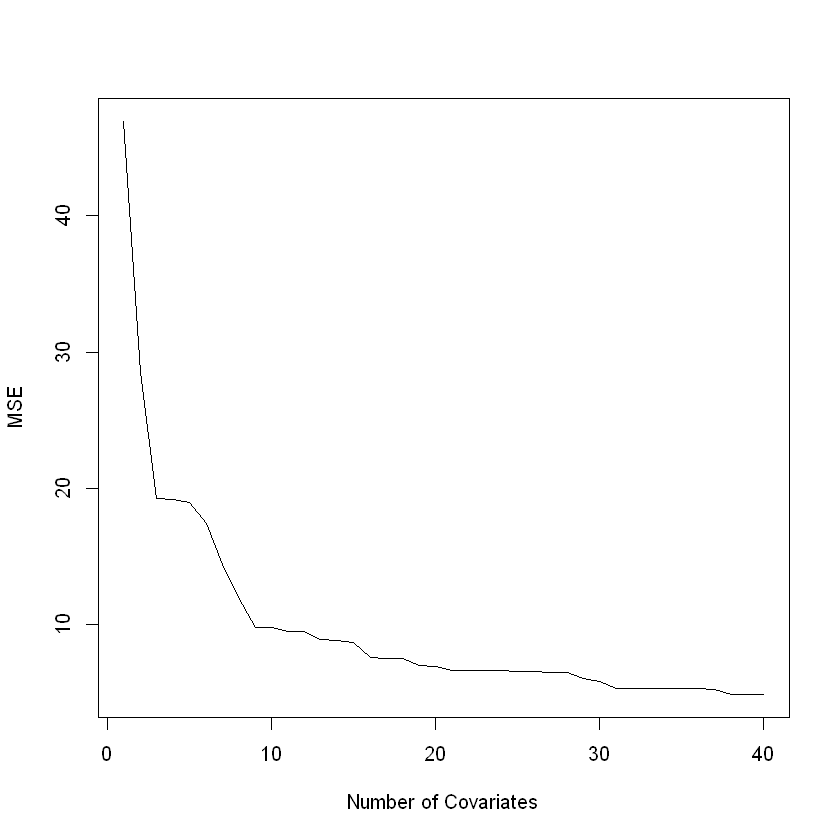

In [8]:
##################### Plot MSE in Training Sample ##################### 

plot(mse[,3],mse[,1], type = "n", ylab = "MSE", xlab = "Number of Covariates")
lines(mse[,3],mse[,1])

print(paste0("MSE for K = 1: ",mse[1,1]))
print(paste0("MSE for K = 10: ",mse[10,1]))
print(paste0("MSE for K = 40: ",mse[40,1]))

## Scatterplot Predicted Prices in Training Sample

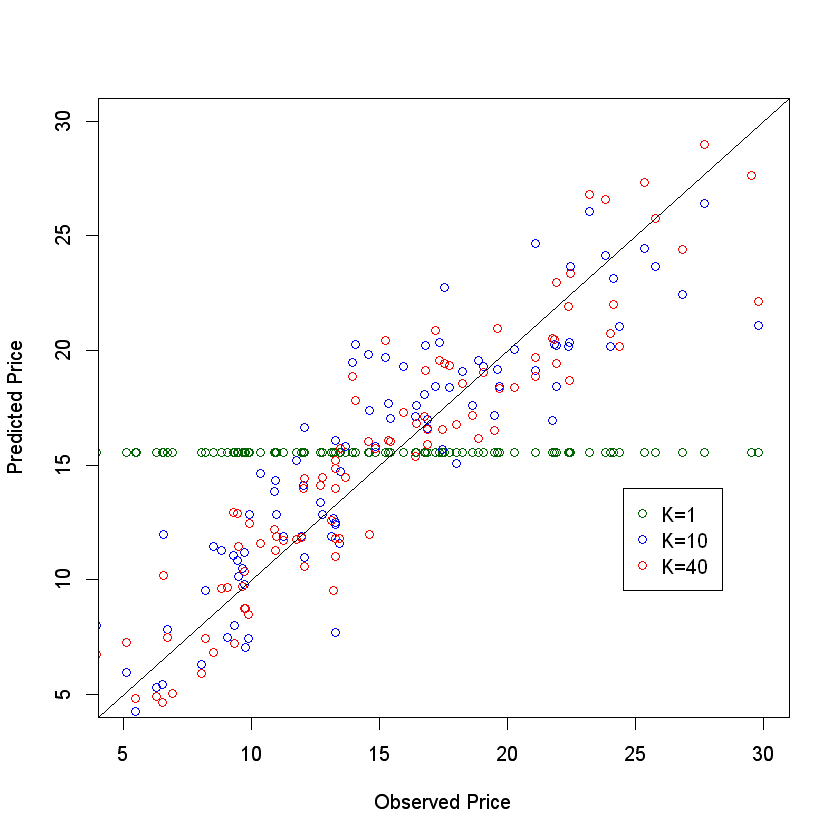

In [3]:
##################### Scatterplot Predicted Prices in Training Sample ##################### 

plot(first_price_train,y_hat_train[,1],xlim=c(5,30),ylim=c(5,30), col= "darkgreen", xlab = "Observed Price", ylab = "Predicted Price" )
par(new=TRUE)
plot(first_price_train,y_hat_train[,10],xlim=c(5,30),ylim=c(5,30), col= "blue", xlab = "Observed Price", ylab = "Predicted Price" )
par(new=TRUE)
plot(first_price_train,y_hat_train[,40],xlim=c(5,30),ylim=c(5,30), col= "red", xlab = "Observed Price", ylab = "Predicted Price" )
abline(a=0,b=1)
legend(24.5, 14, c("K=1", "K=10", "K=40"), col = c("darkgreen", "blue", "red"), pch = c(21, 21, 21))

## Plot MSE in Test Sample

[1] 45.7416
[1] 8.222041
[1] 46.49916


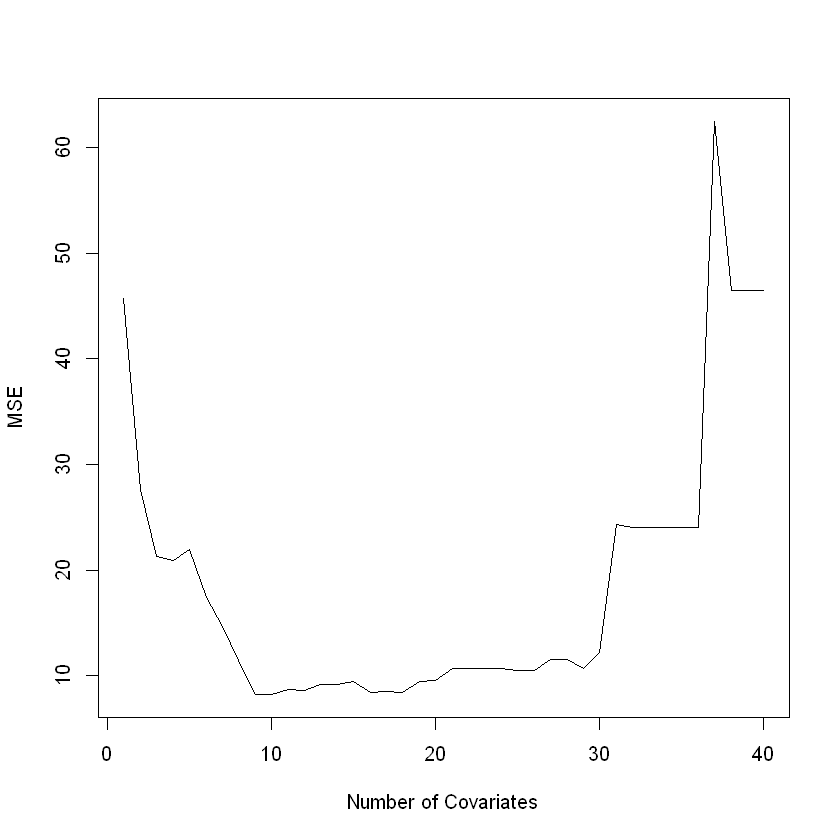

In [5]:
##################### Plot MSE in Test Sample ##################### 

plot(mse[,3],mse[,2], type = "n", ylab = "MSE", xlab = "Number of Covariates")
lines(mse[,3],mse[,2])

print(paste0("MSE for K = 1: ",mse[1,2]))
print(paste0("MSE for K = 10: ",mse[10,2]))
print(paste0("MSE for K = 40: ",mse[40,2]))

## Scatterplot Predicted Prices in Test Sample

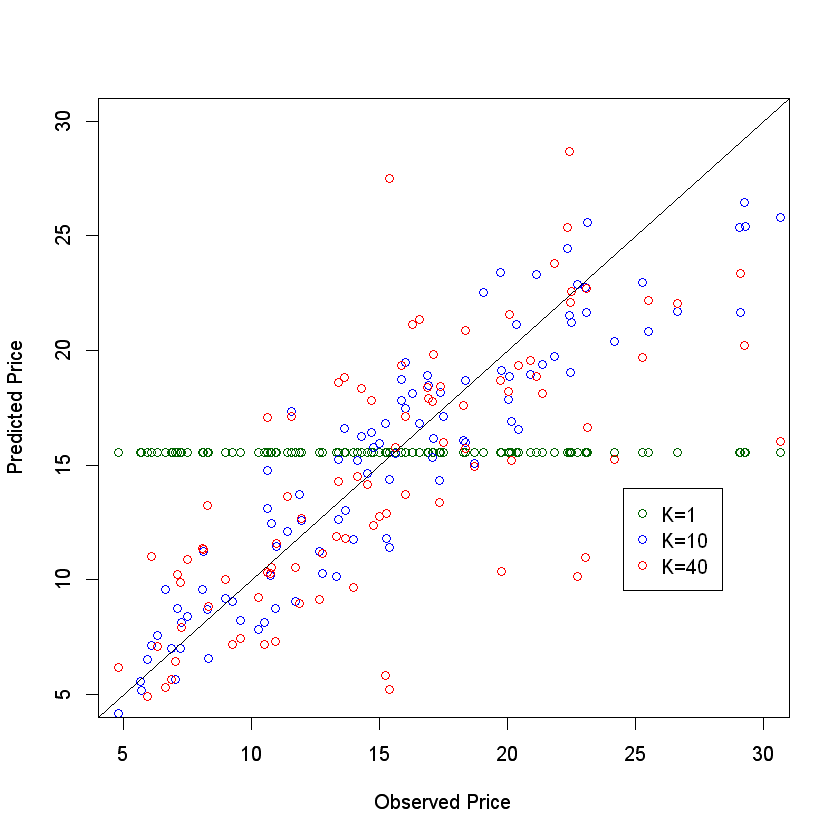

In [42]:
##################### Scatterplot Predicted Prices in Test Sample ##################### 

plot(first_price_test,y_hat_test[,1],xlim=c(5,30),ylim=c(5,30), col= "darkgreen", xlab = "Observed Price", ylab = "Predicted Price")
par(new=TRUE)
plot(first_price_test,y_hat_test[,10],xlim=c(5,30),ylim=c(5,30), col= "blue", xlab = "Observed Price", ylab = "Predicted Price")
par(new=TRUE)
plot(first_price_test,y_hat_test[,40],xlim=c(5,30),ylim=c(5,30), col= "red", xlab = "Observed Price", ylab = "Predicted Price")
abline(a=0,b=1)
legend(24.5, 14, c("K=1", "K=10", "K=40"), col = c("darkgreen", "blue", "red"), pch = c(21, 21, 21))

# Simulation of Bias-Variance Trade-Off

We load a large data set from *myLemons* with 104,721 observations and the same covariates as above. We take one observation to the test sample. We simulate the used car prices with the model
\begin{equation*}
price = \hat{\beta}_0 + \hat{\beta}_1 mileage + \epsilon,
\end{equation*}
where $\hat{\beta}_0$ and $\hat{\beta}_1$ are obtained from OLS estimates in the real data and $\epsilon \sim N(0,sd^2)$ (with $sd = 4$) adds artifical noise to the DGP. We subsample the data in $sub = 1000$ partitions.

For each replication, we estimate OLS model. We add covariates successively. We calulate the MSE, squared-bias, and variance accross all simulations.

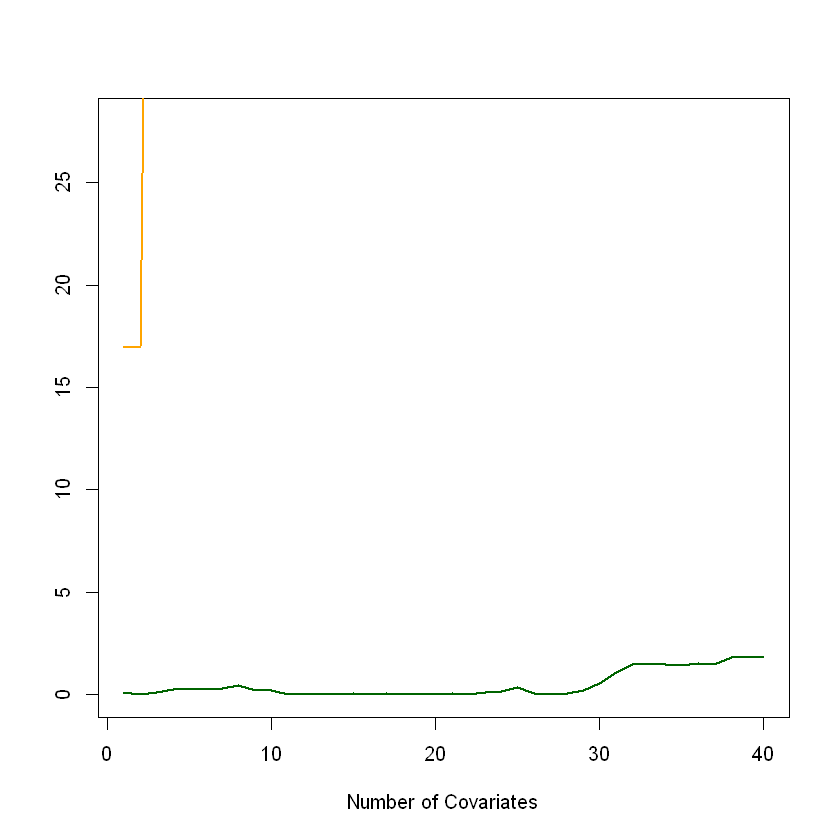

In [31]:

# Set input parameters for the simulation
sub = 1000 # number of subamples
sd = 40 # irreducable noise

# Load data
data_raw <- read.csv("Data/mylemon.csv",header=TRUE, sep=",")

# Set starting values for random number generator
set.seed(100001)

# Select training and test sample
df_train <- data_raw[-1,] # drops the first observation
df_test <- data_raw[1,] # contains only the first observation

# Define outcome and control variable
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))]))

# Simulate the Data Generating Process
u_tr <- matrix(rnorm(nrow(first_price_train),0,sd),nrow= nrow(first_price_train), ncol =1) # Irreducable noise
formular <- lm.fit(rbind(covariates_train[,c(1,2)],covariates_test[,c(1,2)]),rbind(first_price_train,first_price_test))
coef <- as.matrix(formular$coefficients)
coef[is.na(coef)] <- 0
y_new_train <- covariates_train[,c(1,2)] %*% coef  +u_tr # only the constant and first variable (mileage) influence the simulated prices
y_0 <- coef[1,1] + coef[2,1]*covariates_test[1,2]  
p <- as.matrix(ceiling(runif(nrow(df_train),0,sub))) # define sample partitions

# Estimate different OLS models on simulated data
#mse1 <- matrix(NA, nrow = ncol(covariates_train), ncol = rep)
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = sub)
y_hat_test <- matrix(NA, nrow = ncol(covariates_train), ncol = sub)
for (n in (1:sub)) { # iterate through replications of DGP
    for (c in (1:ncol(covariates_train))){ # iterate through OLS models with different number ofcovariates
        formular <- lm.fit(as.matrix(covariates_train[p==n,c(1:c)]),y_new_train[p==n,])
        y_hat_train <- formular$fitted.values
        coef <- as.matrix(formular$coefficients)
        coef[is.na(coef)] <- 0
        y_hat_test[c,n] <- covariates_test[c(1:c)] %*% coef
        mse[c,n] <- mean((y_hat_test[c,n] - y_0 - rnorm(1,0,sd))^2)
    }
}

test <- matrix(NA, nrow = ncol(covariates_train), ncol = 3)
for (c in (1:ncol(covariates_train))){
    test[c,1] <- var(y_hat_test[c,])
    test[c,2] <- mean(y_hat_test[c,]- y_0)^2
    test[c,3] <- mean(mse[c,]) 
}
test <- cbind(test,seq(1,nrow(mse)))

# Plot Bias-Variance Trade-Off
plot(test[,4],test[,3], type = "n", ylab = "", xlab = "Number of Covariates", ylim = c(0,28))
lines(test[,4],test[,3], col = "red",lwd = 2)
par(new=TRUE)
lines(test[,4],test[,2], col = "darkgreen",lwd = 2)
par(new=TRUE)
lines(test[,4],test[,1], col = "orange",lwd = 2)
abline(h=sd^2,lty = 3)
legend(24.5, 650, c("MSE", "Squared-Bias", "Variance"), col = c("red", "darkgreen", "orange"), lty = c(1,1, 1),lwd = 2)